### This jupyter notebook is to unit-test CFE model run

## Preparation

In [1]:
# Import modules
import json
from bmi_cfe import BMI_CFE

In [2]:
input_json = '../../data/unit_test/config_cfe.json'
params = {
    "forcing_file": "G:/Shared drives/Ryoko and Hilary/SMSigxModel/analysis/data/Coweeta/forcing_daily_2014_2018.csv",
    "catchment_area_km2": 0.1210,
    "soil_params": {
        "bb": 75.19153577070811,
        "satdk": 0.5432628576941165,
        "satpsi": 0.78,
        "slop": 0.04640925155351947,
        "smcmax": 0.30584049780916,
        "wltsmc": 0.000142,
        "D": 2,
    },
    "max_gw_storage": 435.89986861041166,
    "Cgw": 6.018829417573535,
    "expon": 1.3570330201405327,
    "K_nash": 0.07159626716623546,
    "refkdt": 962.1121065289033,
    "trigger_z_fact": 0.5591098465676705,
    "alpha_fc": 0.1458881034245107,
    "K_lf": 0.6701249967892469,
    "num_nash_storage": 13, 
    "giuh_ordinates": [1.0],
    "stand_alone": 1,
    "unit_test": 1,
    "time_step_size": 86400,
    "gw_scheme": "Exponential",
    "compare_results_file": "G:/Shared drives/Ryoko and Hilary/SMSigxModel/analysis/data/Coweeta/test_daily_2014_2018_sm_basinavg.csv",
}

with open(input_json, 'w') as outfile:
    json.dump(params, outfile, indent=4)

with open(input_json) as outfile:
    loaded_data = json.load(outfile)

## Run the model

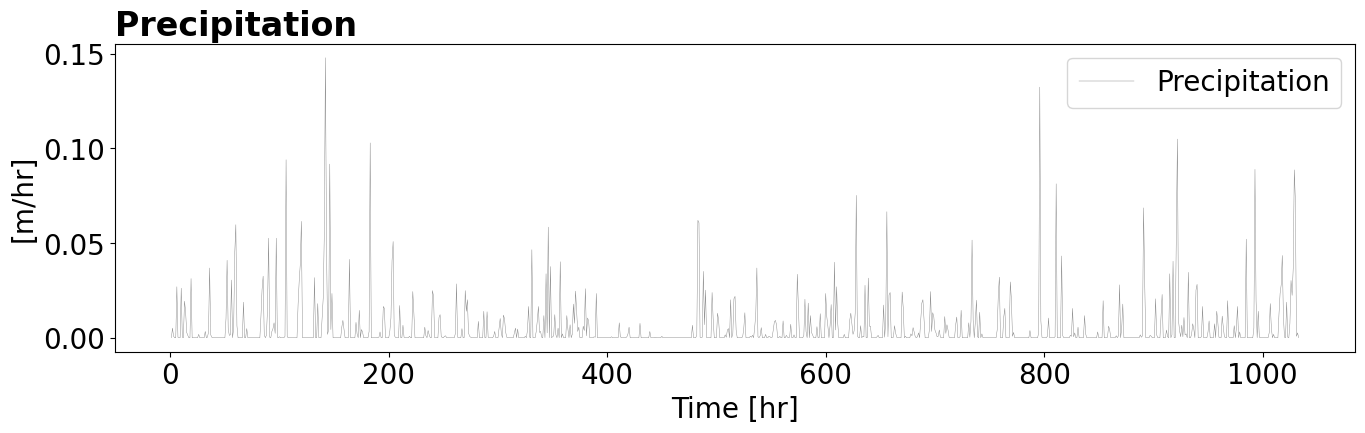

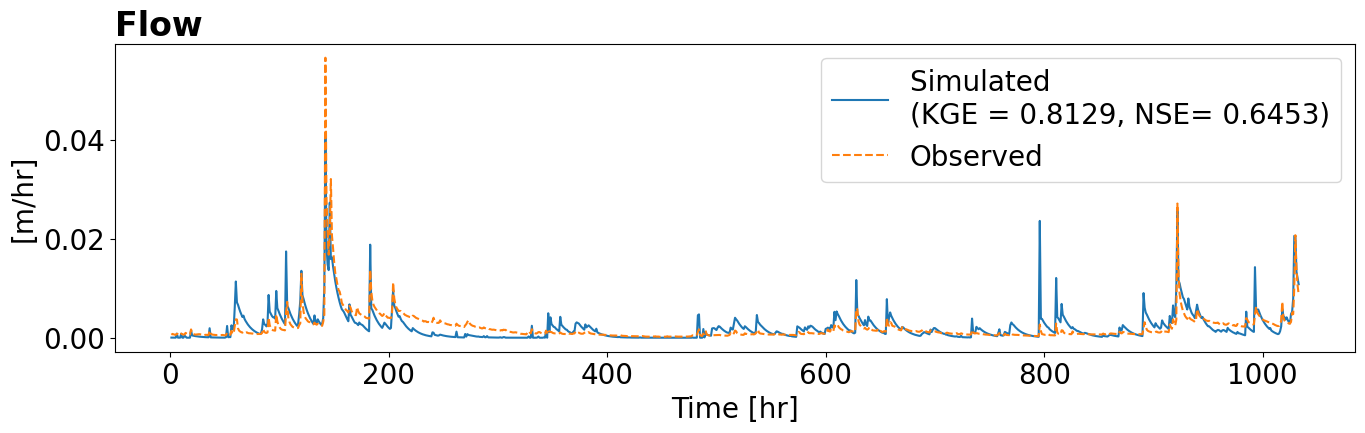

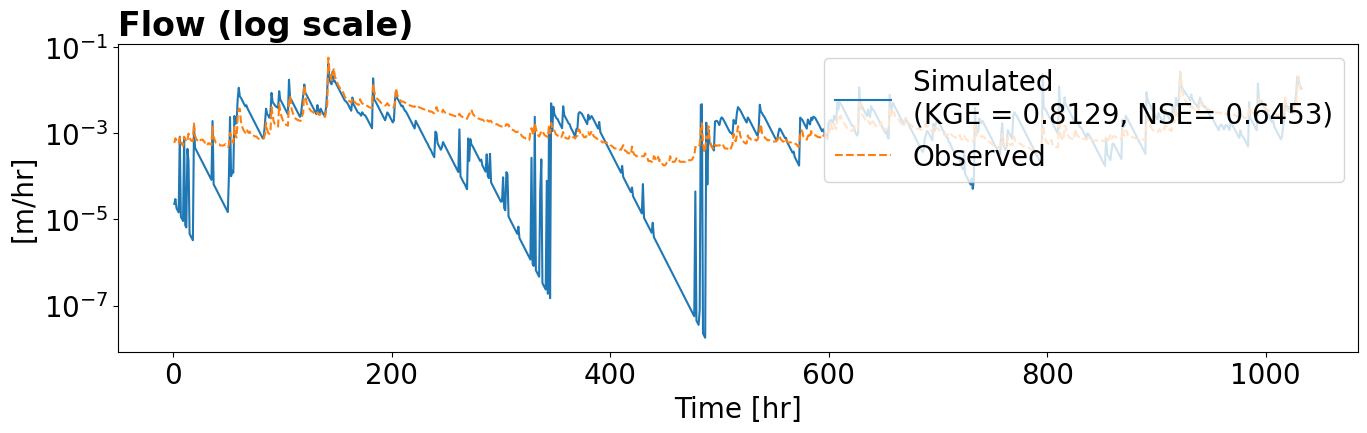

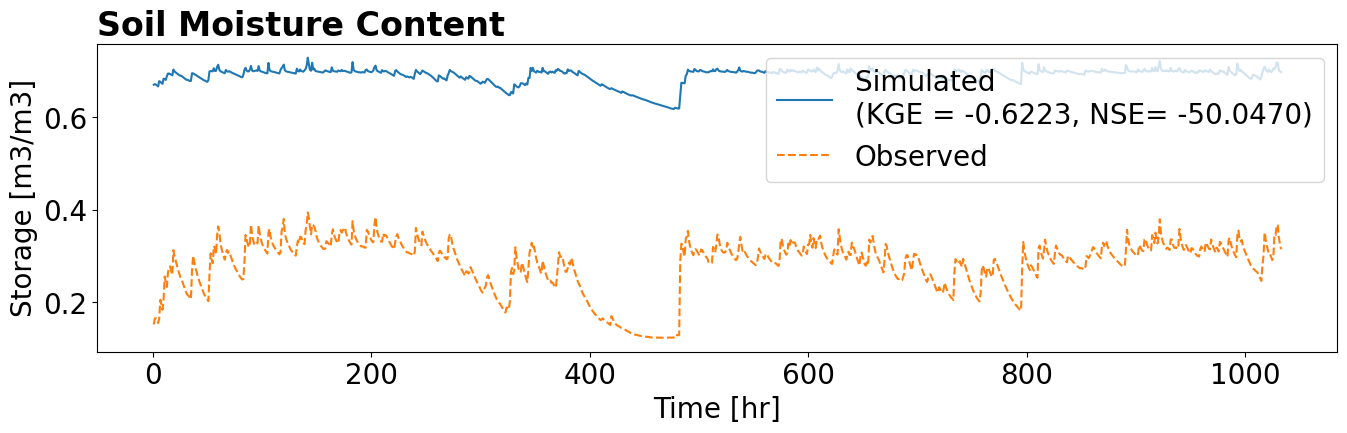

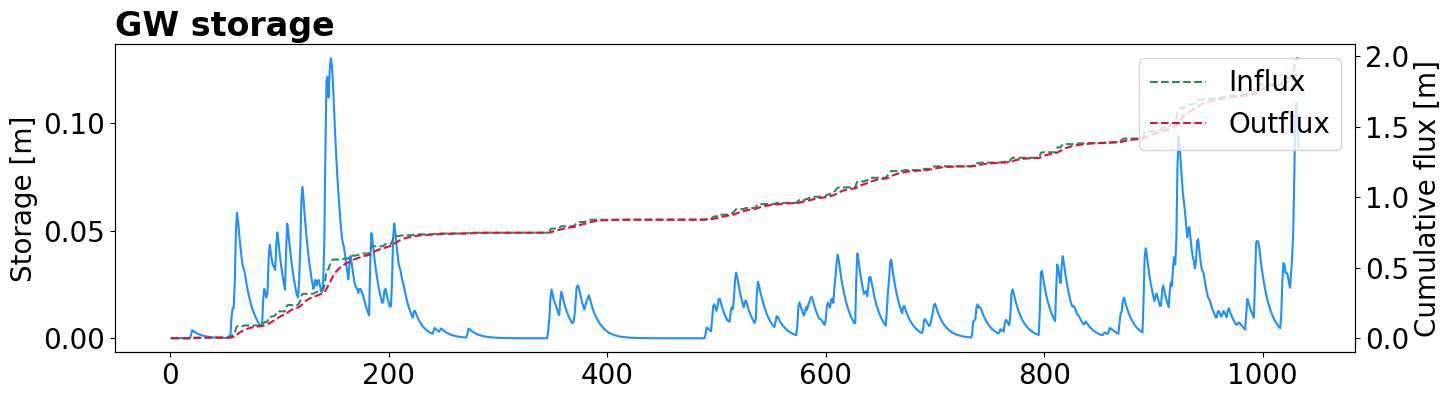

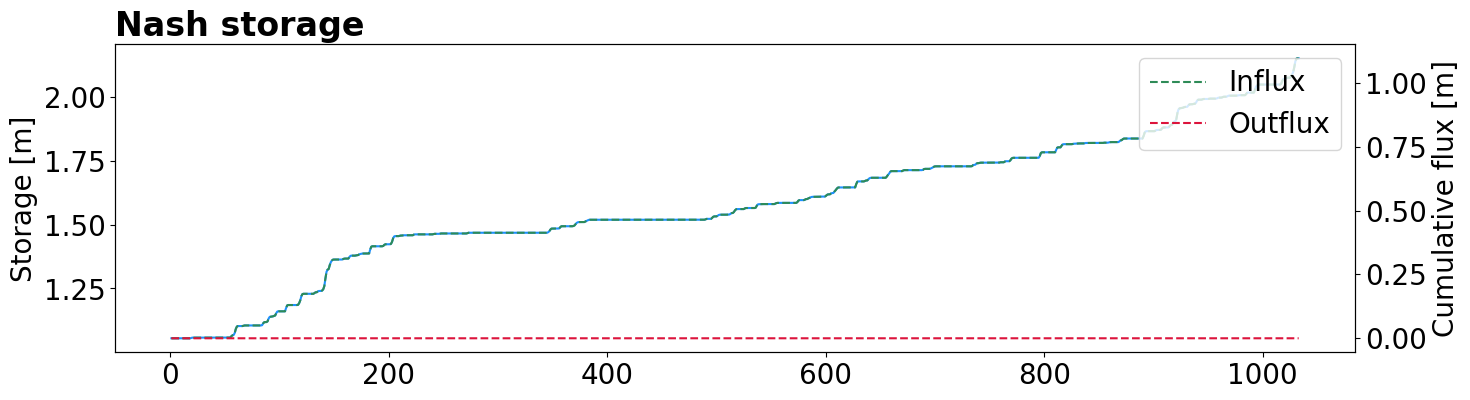

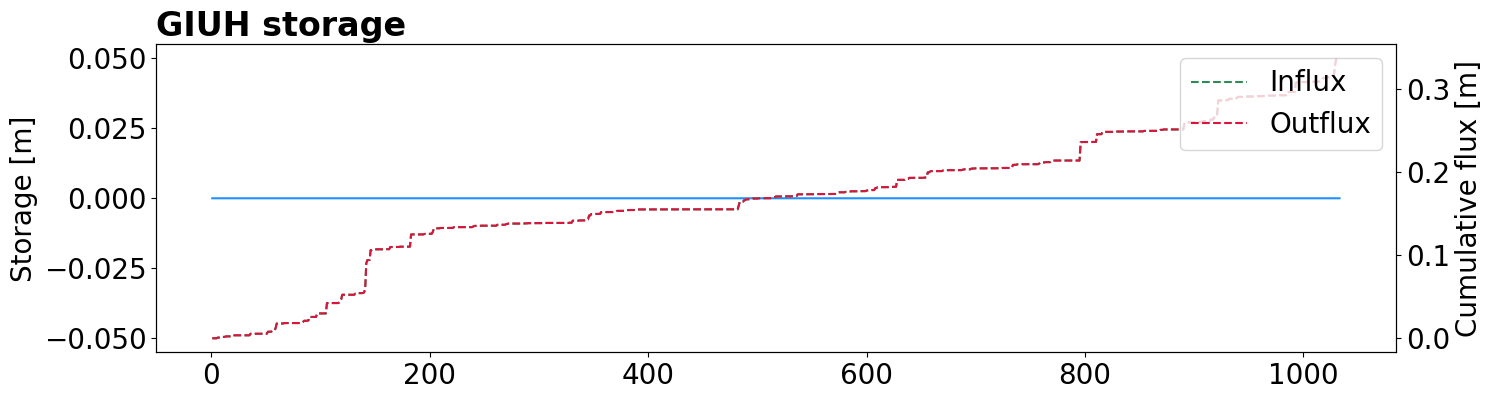


GLOBAL MASS BALANCE
      initial volume:   1.3508
        volume input:   5.7958
       volume output:   5.6743
        final volume:   1.4723
            residual: 7.5495e-15

 Discharge details
Cumulative discharge: 2.24
        Runoff ratio: 0.39
      Surface runoff: 0.15
  Deep GW to channel: 0.85
        Lateral flow: 0.00

 AET & PET
      volume PET:   2.3682
      volume AET:   2.3372
ET from rainfall:   0.6606
    ET from soil:   1.6766

SCHAAKE MASS BALANCE
    volume input:   5.7958
ET from rainfall:   0.6606
  surface runoff:   0.3367
             IOF:   0.3367
             SOF:   0.0000
    infiltration:   4.7986
schaake residual: -1.2434e-14

GIUH MASS BALANCE
  vol. into giuh:   0.3367
   vol. out giuh:   0.3367
 vol. end giuh q:   0.0000
   giuh residual: 0.0000e+00

SOIL WATER CONCEPTUAL RESERVOIR MASS BALANCE
   init soil vol:   1.3506
  vol. into soil:   4.7986
vol.soil2latflow:   1.0958
 vol. soil to gw:   1.9835
 vol. soil to ET:   1.6766
 final vol. soil:   1.3

In [3]:
cfe_instance = BMI_CFE(input_json)
cfe_instance.initialize()
cfe_instance.run_unit_test(
    plot=True,
    print_fluxes=False,
    plot_lims=list(range(1, 1034)),
    warm_up=True,
    warmup_offset=300,
    warmup_iteration=10
)
cfe_instance.finalize(print_mass_balance=True)

In [4]:
cfe_instance.soil_reservoir

{'is_exponential': False,
 'storage_max_m': 1.996,
 'coeff_primary': 0.687290819919432,
 'exponent_primary': 1,
 'storage_threshold_primary_m': 1.399782156503109,
 'coeff_secondary': 0.3796917317143613,
 'exponent_secondary': 1,
 'storage_threshold_secondary_m': 1.399782156503109,
 'storage_m': 1.3931941306354674}